# BUAN 6341 Applied Machine Learning 
## Assignment 1 <br/> Ga Hyun Lee

In [1]:
#--- Import packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from random import seed
%matplotlib inline

## Task Part 1. <br/>Download the dataset and partition it randomly into train and test set using a good train/test split percentage.

In [2]:
#---Import data

df = pd.read_csv('energydata_complete.csv')
print('Data Overview')
print(df.head())
print('Data Types')
print(df.dtypes)
print()

#---Dataframe shape
print('Data Frame Shape:', df.shape)

#---To check missing data
print(('Number of Missing Data:', df.isnull().sum().sum())) # no missing data
print()

#---To check statistics of dataset
print('Stats')
print(df.describe())

#---We can see that some of the features varies in scale. (e.g. 'T1' vs. 'Press_mm_hg')
#---We need to normalize our data and remove some unnecessary variables

#---Remove columns(variables) we won't use
labels_to_drop = ['date','lights']
df0 = df.drop(labels=labels_to_drop, axis=1) # df.drop(): non-fruitful function

print(df0.head())
#print(df.describe())


Data Overview
                  date  Appliances  lights     T1       RH_1    T2       RH_2  \
0  2016-01-11 17:00:00          60      30  19.89  47.596667  19.2  44.790000   
1  2016-01-11 17:10:00          60      30  19.89  46.693333  19.2  44.722500   
2  2016-01-11 17:20:00          50      30  19.89  46.300000  19.2  44.626667   
3  2016-01-11 17:30:00          50      40  19.89  46.066667  19.2  44.590000   
4  2016-01-11 17:40:00          60      40  19.89  46.333333  19.2  44.530000   

      T3       RH_3         T4    ...             T9   RH_9     T_out  \
0  19.79  44.730000  19.000000    ...      17.033333  45.53  6.600000   
1  19.79  44.790000  19.000000    ...      17.066667  45.56  6.483333   
2  19.79  44.933333  18.926667    ...      17.000000  45.50  6.366667   
3  19.79  45.000000  18.890000    ...      17.000000  45.40  6.250000   
4  19.79  45.000000  18.890000    ...      17.000000  45.40  6.133333   

   Press_mm_hg  RH_out  Windspeed  Visibility  Tdewpoint    

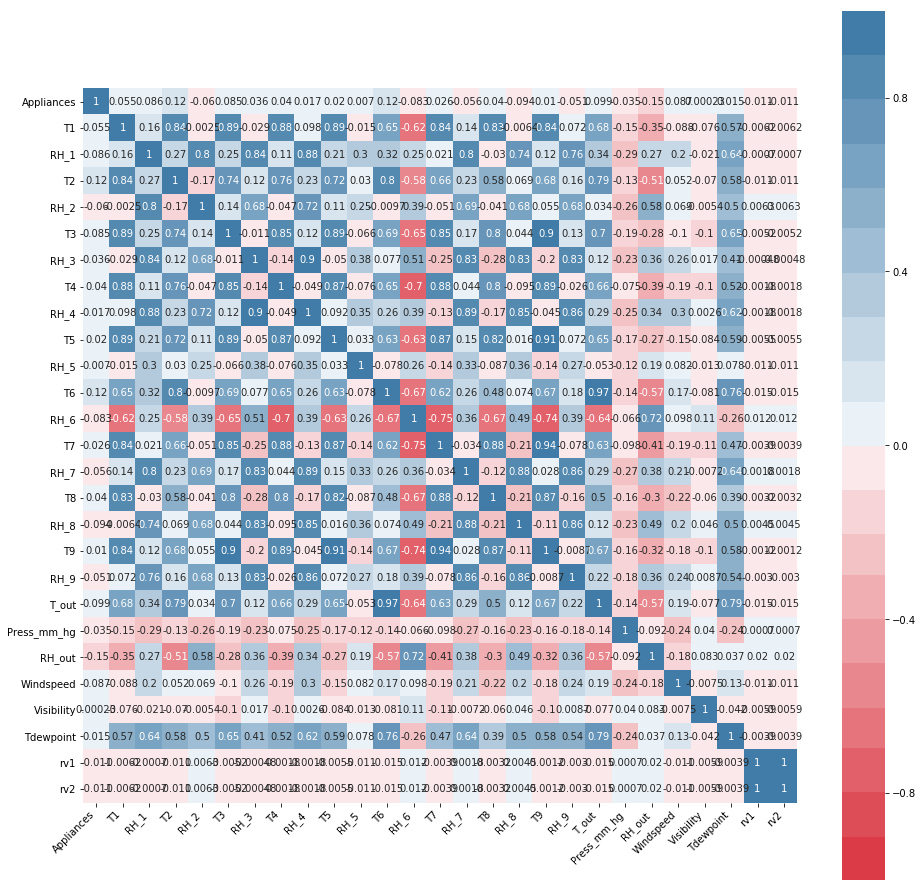

"\n#---Correlogram\nplt.figure(figsize=(16, 16))\nsns.pairplot(df, kind='scatter')\nplt.show()\n"

In [3]:
#---EDA
#---Correlation matrix

corr = df0.corr()
plt.figure(figsize=(16, 16))
ax = sns.heatmap(
    corr, 
    annot=True,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(10, 240, n=20),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);
plt.show(ax)


#---It takes too long time to execute, so if you want to see, just remove ''''''
'''
#---Correlogram
plt.figure(figsize=(16, 16))
sns.pairplot(df, kind='scatter')
plt.show()
'''

In [4]:
#---Remove more columns for my model after some EDA

col_names = list(df0.columns.values.tolist()) 
print(col_names)

'''
#--- Change the order of columns
df1 = df0[['Appliances', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out',  'RH_out', 'Press_mm_hg', 'Windspeed', 'Visibility','Tdewpoint','rv1', 'rv2']]
col_names = list(df1.columns.values.tolist()) 
print('\n', col_names)
'''
labels_to_drop2 = ['T6', 'RH_6', 'rv1', 'rv2', 'Tdewpoint']
df1 = df0.drop(labels=labels_to_drop2, axis=1) 

col_names = list(df1.columns.values.tolist()) 
print('\n', col_names)

#--- Change the order of columns
df1 = df1[['Appliances', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out',  'RH_out', 'Press_mm_hg', 'Windspeed', 'Visibility']]
col_names = list(df1.columns.values.tolist()) 
print('\n', col_names)


['Appliances', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint', 'rv1', 'rv2']

 ['Appliances', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility']

 ['Appliances', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out', 'RH_out', 'Press_mm_hg', 'Windspeed', 'Visibility']


In [5]:
#--- Partition data randomly into train and test set using a good train/test split percentage.
#--- Split Train and Test data set with Train:Test = 70:30 ratio.

train, test = train_test_split(df1, test_size=0.3, random_state=123, shuffle=True)

print('len(train):', len(train))
print('train.shape[0]:', train.shape[0])
print('train.shape[1]:', train.shape[1])

#--- Create X and y for train and test set

X_tr = train.iloc[:,1:]
y_tr = train.iloc[:,0:1]

X_ts = test.iloc[:,1:]
y_ts = test.iloc[:,0:1]

len(train): 13814
train.shape[0]: 13814
train.shape[1]: 22


In [7]:
#---Normalize Variables using Z-score

def normalize_df(df):
    df = (df - df.mean())/df.std()
    print('Df normalized!')
    return df

XN_tr = normalize_df(X_tr)
XN_ts = normalize_df(X_ts)


Df normalized!
Df normalized!


## Task Part 2. <br/>Design a linear regression model to model the energy usage of appliances. Include your regression model equation in the report.
## Task Part 3. <br/> Implement the gradient descent algorithm with batch update rule. Use the same cost function as in the class (sum of squared error). Report your initial parameter values.

In [6]:
#--- Part 2: Design a linear regression model to model the energy usage of appliances. 
#--- Include your regression model equation in the report.

#---Create add intercept function
def add_1_col(my_X):
    '''Adding Intercept'''
    ones = np.ones([my_X.shape[0],1]) # for beta0(=intercept): create an array containing only ones
    my_X = np.concatenate((ones, my_X), axis=1) # this changes the data type of my_mx from df to array
    return my_X
#X = add_1_col(X)

#---Create Cost/error function

def cal_cost(X, y, beta):
    '''To Calculate Cost'''
    if isinstance(X, pd.DataFrame) == True:
        X = np.array(X)
    m = X.shape[0]          # number of training examples(=data points)
    if isinstance(y, np.ndarray) == False:
        y = y.values        # Convert y to array, if it's not
        y = y.reshape([len(y),1])
    yhat = X @ beta.T       # @ = matrix multiplication
    if isinstance(yhat, np.ndarray) == False:
        yhat = yhat.values          # Convert yhat to array, if it's not
        yhat = yhat.reshape([len(h),1])
    diff = yhat - y
    sse = np.sum(np.power((diff), 2))   # sum of squared errors
    cost = (1/(2 * m)) * sse            # cost/error calculation
    #print('Cost Calculated:', cost)
    return cost
#beta = np.zeros((1, X.shape[1]))
#cal_cost(X, y, beta)

#--- Create function for updating beta simultaneously

def update_B(X, y, beta, alpha=0.1):
    ''' Following Batch Update Rule'''
    if isinstance(y, np.ndarray) == False:
        y = y.values        # Convert y to array, if it's not
        y = y.reshape([len(y),1])
    yhat = X @ beta.T       # @ = matrix multiplication
    if isinstance(yhat, np.ndarray) == False:
        yhat = yhat.values          # Convert yhat to array, if it's not
        yhat = yhat.reshape([len(h),1])
    diff = yhat - y
    beta = beta - (alpha/len(X)) * np.sum(X * (diff), axis=0)
    #print('beta:', beta)
    return beta
#update_B(X, y)
#print(type(beta))

In [8]:
#--- Create function for linear regression modeling 
#--- alpha and threshold selected randomly

def lin_Reg(X, y, B, alpha=0.09, max_iters=15000, threshold=0.00001):
    seed(1)
    iters = 0
    
    if isinstance(X, pd.DataFrame) == True :
        X = np.array(X)
    if isinstance(y, np.ndarray) == False:
        y = y.values        # Convert y to array, if it's not
        y = y.reshape([len(y),1])

    the_cost = cal_cost(X, y, B)
    converged = False
    the_beta = B
    cost_lst =[]

    while converged == False :
        new_beta = update_B(X, y, the_beta, alpha)
        new_cost = cal_cost(X, y, new_beta)
        
        if abs(new_cost - the_cost) <= threshold :
            print('Converged!')
            break
        
        # Update error(=cost) and iters and betas
        cost_lst.append(new_cost) # for plotting later
        the_cost = new_cost
        iters += 1
        the_beta = new_beta
        
        #print('Cost:', the_cost, 'iters:', iters, the_beta)
        
        if iters == max_iters:
            print('Max_iter reached.')
            break
      
    print('Final_Cost:', the_cost, '\nFinal_iters:', iters)
    #print('\nFinal_Cost: {0: .2f} \nFinal_iters: {1}'.format(the_cost, iters))
    return the_beta, the_cost, iters, cost_lst


In [9]:
#---Train our model with train set by linear regression
X = XN_tr.copy()
X = add_1_col(X)
y = y_tr.copy()
beta = np.zeros((1, X.shape[1]))
beta_fit, cost_train, iters_train, cost_lst_train = lin_Reg(X, y, beta)
print('\nBetas(=Coefficients):\n', beta_fit)


#---Testing our model in the test data set
#beta = np.zeros((1, X.shape[1]))
X_test = XN_ts.copy()
X_test = add_1_col(X_test)
y_test = y_ts.copy()


#--- Use betas first by run the model on train set
#--- Calculate the cost/error for test set

cost_test = cal_cost(X_test, y_test, beta_fit)
#print('\nCost for test set:',  cost_test)
print('\nCost for test set: {:.4f}'.format(cost_test))


Converged!
Final_Cost: 4531.165697691965 
Final_iters: 3172

Betas(=Coefficients):
 [[ 9.80128855e+01 -6.34170781e+00  6.37557142e+01 -3.23139171e+01
  -5.59998894e+01  5.22603277e+01  1.30286529e+01  3.28444395e+00
   1.26033474e+01 -3.70319137e+00  2.16774023e+00  1.91383038e+00
  -9.83819878e+00  1.70648009e+01 -3.32277206e+01 -4.15136228e+01
  -5.57612588e+00  7.37409488e+00  6.43492664e+00 -4.46981734e-02
   5.49339631e+00  2.32106293e+00]]

Cost for test set: 4498.5062


In [10]:
'''
#--- Create Function for MSE
def get_mse(X, y, beta):
    if isinstance(X, pd.DataFrame):
        X = np.array(X)
    if isinstance(y, pd.DataFrame):
        y = y.values
        y = y.reshape([len(y),1])
    mse = 2*cal_cost(X, y, beta)
    return mse
'''

'\n#--- Create Function for MSE\ndef get_mse(X, y, beta):\n    if isinstance(X, pd.DataFrame):\n        X = np.array(X)\n    if isinstance(y, pd.DataFrame):\n        y = y.values\n        y = y.reshape([len(y),1])\n    mse = 2*cal_cost(X, y, beta)\n    return mse\n'

#### Use Packages to compare the coefficients and errors

In [11]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
X = XN_tr.copy()
X_test = XN_ts.copy()
# Create linear regression object
regr = linear_model.LinearRegression(fit_intercept=True)

# Train the model using the train sets
regr.fit(X, y)

# Make predictions using the train set
y_pred = regr.predict(X)
# Make predictions using the test set
y_pred_test = regr.predict(X_test)

# The coefficients
print('Coefficients: \n', regr.intercept_, regr.coef_)
print()
# The mean squared error and Cost(from class) for Train set
print("Mean squared error for Train: %.3f" % mean_squared_error(y, y_pred))
print("Cost for Train: %.3f" % (mean_squared_error(y, y_pred)/2))
print()
# The mean squared error and Cost(from class) for Test set
print("Mean squared error for Test: %.3f" % mean_squared_error(y_test, y_pred_test))
print("Cost for Test: %.3f" % (mean_squared_error(y_test, y_pred_test)/2))
print()
# Explained variance score: 1 is perfect prediction
print('Variance score for Train: %.3f' % r2_score(y, y_pred))
print('Variance score for Test: %.3f' % r2_score(y_test, y_pred_test))

# similar to the result above.

Coefficients: 
 [98.01288548] [[-6.08715665e+00  6.40068446e+01 -3.27170972e+01 -5.63570651e+01
   5.22123754e+01  1.30404841e+01  3.29149625e+00  1.26718853e+01
  -3.73123852e+00  2.17634707e+00  1.81404486e+00 -9.79344580e+00
   1.70402949e+01 -3.32588450e+01 -4.13001968e+01 -5.57139545e+00
   7.39987528e+00  6.44086491e+00 -4.19405145e-02  5.48413421e+00
   2.32162186e+00]]

Mean squared error for Train: 9062.324
Cost for Train: 4531.162

Mean squared error for Test: 8997.181
Cost for Test: 4498.590

Variance score for Train: 0.139
Variance score for Test: 0.141


## Experimentation 1. on Linear Regression

In [12]:
#--- Experimentation 1_Linear Regression
#--- Create plotting function

def plot_errors_on_iters(iters, cost, alpha, threshold, color = 'r'):
    fig, ax = plt.subplots()
    #x_1 = np.arange(iters).reshape([iters,1])
    #iters = iters.reshape([len(iters),1])
    ax.plot(np.arange(iters), cost, color)  
    ax.set_xlabel('Iterations')  
    ax.set_ylabel('Error')  
    ax.set_title('Error vs. Training Epoch (alpha = {}, threshold ={})'.format(alpha, threshold))  
    pass


Converged!
Final_Cost: 4533.754130772612 
Final_iters: 802

Cost for test set with beta11: 4498.0783673942515

Converged!
Final_Cost: 4550.189525828156 
Final_iters: 3531

Cost for test set with beta12: 4512.0156322565645

Converged!
Final_Cost: 4637.453404962852 
Final_iters: 8924

Cost for test set with beta13: 4599.796463867833

Max_iter reached.
Final_Cost: 5113.196674472401 
Final_iters: 15000

Cost for test set with beta14: 5053.763076946858



"\n#--- Just to see: Using learning rate(alpha): 1\nal = 1\nbeta15, cost_train15, iters_train15, cost_lst_train15 = lin_Reg(X, y, beta, alpha=al, threshold=th)\nplot_errors_on_iters(iters_train15, cost_lst_train15, alpha=1, threshold=0.01, color ='c')\ncost_test15 = cal_cost(X2, y2, beta15)\nprint('\nCost for test set with beta15:', cost_test15)\n"

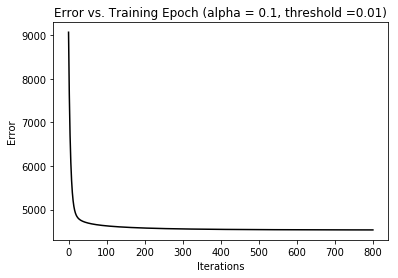

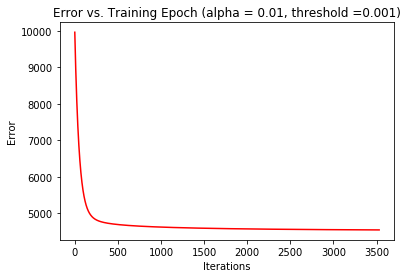

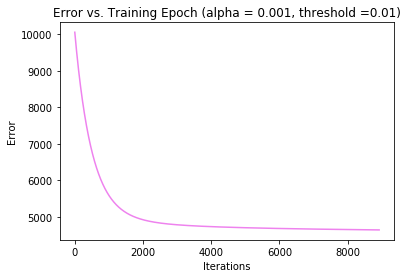

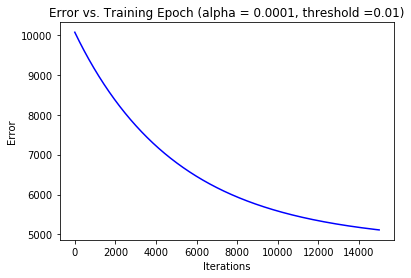

In [13]:
#--- Threshold is set to be 0.001 for various alphas
#--- Threshold default: 0.001
#--- Max iteration number default: 15,000
#--- Threshold and Max iteration number can change it by inserting your own values.

X = XN_tr.copy()
X = add_1_col(X)
y = y_tr.copy()
beta = np.zeros((1, X.shape[1]))
X_test = XN_ts.copy()
X2 = X_test
X2 = add_1_col(X2)
y2 = y_test
th = 0.01

'''
#--- Using learning rate(alpha): 0.9
al = 0.9
beta111, cost_train111, iters_train111, cost_lst_train111 = lin_Reg(X, y, beta, alpha=al, threshold=th)
plot_errors_on_iters(iters_train111, cost_lst_train111, alpha=0.9, threshold=0.001, color = 'c')
cost_test111 = cal_cost(X2, y2, beta111)
print('\nCost for test set with beta11:', cost_test111)
print()
'''
#--- Using learning rate(alpha): 0.1
al = 0.1
beta11, cost_train11, iters_train11, cost_lst_train11 = lin_Reg(X, y, beta, alpha=al, threshold=th, max_iters=15000)
plot_errors_on_iters(iters_train11, cost_lst_train11, alpha=0.1, threshold=0.01, color = '#000000')
cost_test11 = cal_cost(X2, y2, beta11)
print('\nCost for test set with beta11:', cost_test11)
print()

#--- Using learning rate(alpha): 0.01
al = 0.01
beta12, cost_train12, iters_train12, cost_lst_train12 = lin_Reg(X, y, beta, alpha=al, threshold=th)
plot_errors_on_iters(iters_train12, cost_lst_train12, alpha=0.01, threshold=0.001)
cost_test12 = cal_cost(X2, y2, beta12)
print('\nCost for test set with beta12:', cost_test12)
print()

#--- Using learning rate(alpha): 0.001
al = 0.001
beta13, cost_train13, iters_train13, cost_lst_train13 = lin_Reg(X, y, beta, alpha=al, threshold=th)
plot_errors_on_iters(iters_train13, cost_lst_train13, alpha=0.001, threshold=0.01, color ='#EE82EE')
cost_test13 = cal_cost(X2, y2, beta13)
print('\nCost for test set with beta13:', cost_test13)
print()

#--- Using learning rate(alpha): 0.0001
al = 0.0001
beta14, cost_train14, iters_train14, cost_lst_train14 = lin_Reg(X, y, beta, alpha=al, threshold=th)
plot_errors_on_iters(iters_train14, cost_lst_train14, alpha=0.0001, threshold=0.01, color ='b')
cost_test14 = cal_cost(X2, y2, beta14)
print('\nCost for test set with beta14:', cost_test14)
print()
'''
#--- Just to see: Using learning rate(alpha): 1
al = 1
beta15, cost_train15, iters_train15, cost_lst_train15 = lin_Reg(X, y, beta, alpha=al, threshold=th)
plot_errors_on_iters(iters_train15, cost_lst_train15, alpha=1, threshold=0.01, color ='c')
cost_test15 = cal_cost(X2, y2, beta15)
print('\nCost for test set with beta15:', cost_test15)
'''

### Experiment 2 on Linear Regression

Converged!
Final_Cost: 4637.334178182271 
Final_iters: 89

Cost for test set with beta11: 4599.70783817048

Converged!
Final_Cost: 4550.14967822483 
Final_iters: 353

Cost for test set with beta11: 4511.970957746708

Converged!
Final_Cost: 4533.754130772612 
Final_iters: 802

Cost for test set with beta17: 4498.0783673942515

Converged!
Final_Cost: 4531.472255397789 
Final_iters: 1413

Cost for test set with beta11: 4497.8709974218

Converged!
Final_Cost: 4531.194761375274 
Final_iters: 2134

Cost for test set with beta11: 4498.3349535028265



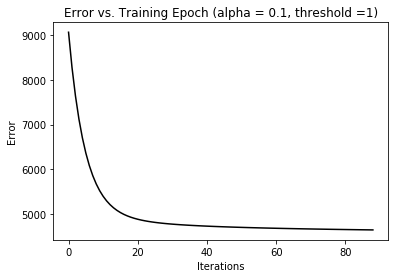

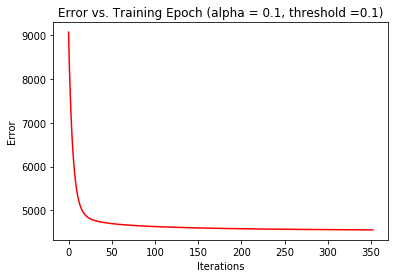

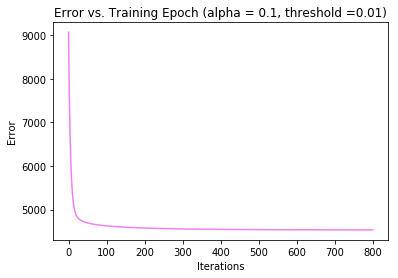

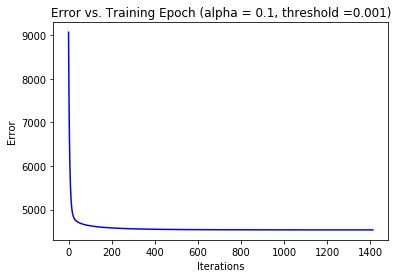

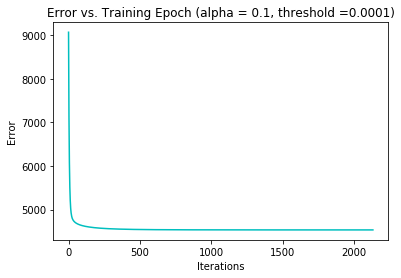

In [14]:
#--- Experimentation 2_Linear Regression
#--- Plot error results for train and test sets as a function of threshold

#--- Alpha is set to be 0.9 for various Thresholds 
#--- Threshold default: 0.00001, but in this experiment it varies from 0.0001 to 1
#--- Max iteration number default: 15,000
#--- Threshold and Max iteration number can change it by inserting your own values.
X = XN_tr.copy()
X = add_1_col(X)
y = y_tr.copy()
beta = np.zeros((1, X.shape[1]))
X_test = XN_ts.copy()
X2 = X_test
X2 = add_1_col(X2)
y2 = y_test
al = 0.1

#--- Using threshold: 1
th = 1
beta16, cost_train16, iters_train16, cost_lst_train16 = lin_Reg(X, y, beta, alpha=al, max_iters=15000, threshold=th)
plot_errors_on_iters(iters_train16, cost_lst_train16, alpha=al, threshold=th, color='#000000')
cost_test16 = cal_cost(X2, y2, beta16)
print('\nCost for test set with beta11:', cost_test16)
print()

#--- Using threshold: 0.1
th = 0.1
beta11, cost_train11, iters_train11, cost_lst_train11 = lin_Reg(X, y, beta, alpha=al, max_iters=15000, threshold=th)
plot_errors_on_iters(iters_train11, cost_lst_train11, alpha=al, threshold=th)
cost_test11 = cal_cost(X2, y2, beta11)
print('\nCost for test set with beta11:', cost_test11)
print()

#--- Using threshold: 0.01
th = 0.01
beta17, cost_train17, iters_train17, cost_lst_train17 = lin_Reg(X, y, beta, alpha=al, max_iters=15000, threshold=th)
plot_errors_on_iters(iters_train17, cost_lst_train17, alpha=al, threshold=th, color='#EE82EE')
cost_test17 = cal_cost(X2, y2, beta17)
print('\nCost for test set with beta17:', cost_test17)
print()

#--- Using threshold: 0.001
th = 0.001
beta18, cost_train18, iters_train18, cost_lst_train18 = lin_Reg(X, y, beta, alpha=al, max_iters=15000, threshold=th)
plot_errors_on_iters(iters_train18, cost_lst_train18, alpha=al, threshold=th, color='b')
cost_test18 = cal_cost(X2, y2, beta18)
print('\nCost for test set with beta11:', cost_test18)
print()

#--- Using threshold: 0.0001
th = 0.0001
beta19, cost_train19, iters_train19, cost_lst_train19 = lin_Reg(X, y, beta, alpha=al, max_iters=15000, threshold=th)
plot_errors_on_iters(iters_train19, cost_lst_train19, alpha=al, threshold=th, color='c')
cost_test19 = cal_cost(X2, y2, beta19)
print('\nCost for test set with beta11:', cost_test19)
print()


In [15]:
#--- Using threshold: 0.001, since its test error was the smallest

X = XN_tr.copy()
X = add_1_col(X)
y = y_tr.copy()
beta = np.zeros((1, X.shape[1]))
X_test = XN_ts.copy()
X2 = X_test
X2 = add_1_col(X2)
y2 = y_test

th = 0.001
al = 0.1
iters = 1413
num_iter_p = [0]
beta_set_p = [beta]
cost_set_train_p = [cal_cost(X, y, beta)]
cost_set_test_p = [cal_cost(X2, y2, beta)]

def test_func(X, y, X2, y2, beta, alpha=al, threshold=th, max_iters = iters):
    seed(1)
    if isinstance(X, pd.DataFrame) == True :
        X = np.array(X)
    if isinstance(y, np.ndarray) == False:
        y = y.values        # Convert y to array, if it's not
        y = y.reshape([len(y),1])
        
    for var in [X, X2]:
        if isinstance(var, pd.DataFrame) == True:
            X = np.array(X)
    for var in [y, y2]:
        if isinstance(var, np.ndarray) == False :
            var = var.values
            var = var.reshape([len(var),1])
    
    beta_set_p = [beta]
    cost_set_train_p = []
    cost_set_test_p = []
    if isinstance(X, pd.DataFrame) == True :
        X = np.array(X)
    if isinstance(y, np.ndarray) == False:
        y = y.values        # Convert y to array, if it's not
        y = y.reshape([len(y),1])
    for i in range(iters):
        train_cost = cal_cost(X, y, beta)
        cost_set_train_p.append(train_cost)
        test_cost = cal_cost(X2, y2, beta)
        cost_set_test_p.append(test_cost)
        beta_set_p.append(beta)
        beta = update_B(X, y, beta, alpha)
    return cost_set_train_p, cost_set_test_p, beta_set_p

cost_lst_train_p, cost_lst_test_p, _ = test_func(X, y, X2, y2, beta, alpha=al, threshold=th, max_iters = iters)

In [16]:
print(cost_lst_train_p[-1], cost_lst_test_p[-1])

4531.4732585213615 4497.870122891188


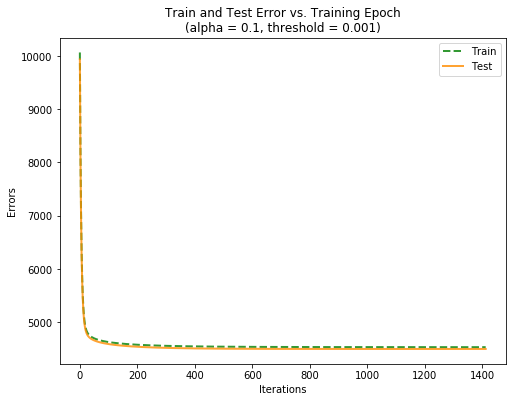

In [17]:
# Best Threshold's Train and test error

cost_lst_train_p = np.array(cost_lst_train_p)
cost_lst_test_p = np.array(cost_lst_test_p)

# Plot the two errors together
lw = 2
alpha = 0.8
plt.figure(figsize=(8,6))
plt.plot(np.arange(iters), cost_lst_train_p, color='g',ls = '--', alpha = alpha, lw = lw, label = 'Train')
plt.plot(np.arange(iters), cost_lst_test_p, color='darkorange', alpha = alpha, lw = lw, label = 'Test')
#plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
#plt.xlim([0, max(len(cost_lst_test_p), len(cost_lst_train_p))+10])
#plt.ylim([0, 5000])
plt.xlabel('Iterations')
plt.ylabel('Errors')
plt.title('Train and Test Error vs. Training Epoch\n(alpha = {}, threshold = {})'.format(al, th))
plt.legend(loc="upper right")
plt.show()


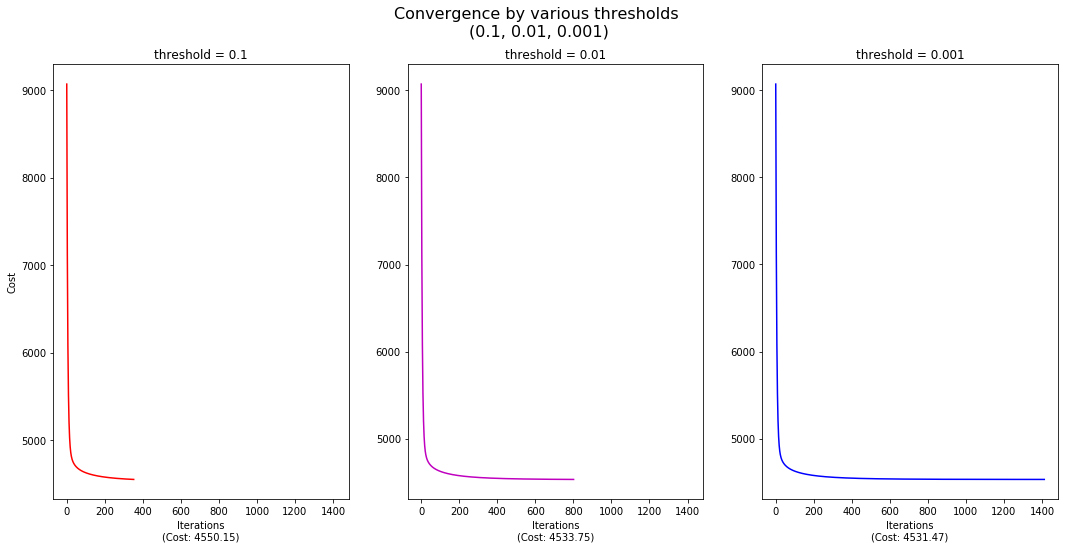

In [18]:
#--- Threshold as 0.01 can be my best threshold when alpha = 0.01

#plt.subplots_adjust(bottom=0.1, right=0.8, top=0.9)
fig, bx = plt.subplots(1, 3, figsize=(18,8), sharex = True)
fig.suptitle('Convergence by various thresholds \n(0.1, 0.01, 0.001)', fontsize=16)
bx[0].plot(np.arange(iters_train11), cost_lst_train11, 'r', label='threshold = 0.1')
bx[0].set_title('threshold = 0.1')
bx[1].plot(np.arange(iters_train17), cost_lst_train17, 'm', label='threshold = 0.01')
bx[1].set_title('threshold = 0.01')
bx[2].plot(np.arange(iters_train18), cost_lst_train18, 'b', label='threshold = 0.001')
bx[2].set_title('threshold = 0.001')
#bx[3].plot(np.arange(iters_train19), cost_lst_train19, 'b', label='threshold = 0.0001')
#bx[3].set_title('threshold = 0.0001')

bx[0].set_xlabel('Iterations\n(Cost: {:.2f})'.format(cost_lst_train11[-1]))
bx[1].set_xlabel('Iterations\n(Cost: {:.2f})'.format(cost_lst_train17[-1]))
bx[2].set_xlabel('Iterations\n(Cost: {:.2f})'.format(cost_lst_train18[-1]))
#bx[3].set_xlabel('Iterations')

bx[0].set_ylabel('Cost')

#plt.title('Scatter plot pythonspot.com', y=-0.01)
#fig.set_ylabel('Errors')
#plt.plot(<X AXIS VALUES HERE>, <Y AXIS VALUES HERE>, 'line type', label='label here')
#plt.plot(iters_train, cost_train, 'r-', label='threshold = 0.1')
#plt.plot(iters_train3, cost_train3, 'b-', label='threshold = 0.01')
#plt.plot(iters_train4, cost_train4, 'g-', label='threshold = 1')
#plt.plot(<X AXIS VALUES HERE>, <Y AXIS VALUES HERE>, 'line type', label='label here')
#plt.tight_layout()
plt.show()


## Task Part 4.<br/>Convert this problem into a binary classification problem. The target variable should have two categories. Implement logistic regression to carry out classification on this data set. Report accuracy/error metrics for train and test sets.

In [19]:
#--- Partition data randomly into train and test set using a good train/test split percentage.
#--- Split Train and Test data set with Train:Test = 70:30 ratio.

train, test = train_test_split(df1, test_size=0.3, random_state=123, shuffle=True)

print('len(train):', len(train))
print('train.shape:', train.shape)
print('test.shape:', test.shape)
print()
#--- Create X and y for train and test set
''' What we did previously for Linear regression

X_tr = train.iloc[:,1:]
y_tr = train.iloc[:,0:1]

X_ts = test.iloc[:,1:]
y_ts = test.iloc[:,0:1]

#---Normalize Variables using Z-score

def normalize_df(df):
    df = (df - df.mean())/df.std()
    print('Df normalized!')
    return df

XN_tr = normalize_df(X_tr)
XN_ts = normalize_df(X_ts)

'''
X = XN_tr.copy()
#X = add_1_col(X)
y = y_tr.copy()

#---Testing our model in the test data set
#beta = np.zeros((1, X.shape[1]))
X_test = XN_ts.copy()
#X_test = add_1_col(X_test)
y_test = y_ts.copy()

#--- Make y as Binary data.

class_div = y['Appliances'].median()

App2 = []
for yi in y['Appliances']:
    if yi >= class_div :
        App2.append(1)
    else :
        App2.append(0)
y.insert(1, "App2", App2, True)
#print(y.head())
yB = y.drop(['Appliances'], axis=1)
print(yB.head())
print()

App2 = []
for yi in y_test['Appliances']:
    if yi >= class_div :
        App2.append(1)
    else :
        App2.append(0)
y_test.insert(1, "App2", App2, True)
#print(y_test.head())
y_testB = y_test.drop(['Appliances'], axis=1)
print(y_testB.head())

theta = np.zeros((X.shape[1], 1))


len(train): 13814
train.shape: (13814, 22)
test.shape: (5921, 22)

       App2
2153      0
14205     0
8031      1
17122     1
3283      1

       App2
9258      1
10439     0
16471     0
7718      0
19622     1


In [21]:
#print('type(X): {0}, X.shape: {1}'.format(type(X_test), X_test.shape))
#print('type(y): {0}, y.shape: {1}'.format(type(y_test), y_test.shape))

def check_array(a):
    if isinstance(a, np.ndarray) == False:
        a = a.values
        a = a.reshape([len(a),1])
    return a
    
def sigmoid(z):
    '''if combined with create_z, predicting y based on z'''
    return 1 / (1 + np.exp(-z))    # pd.series as its output  = predict(y)

def predict(X, theta):
    '''
   Returns 1D array of probabilities
   that the class label == 1
    '''
    z = X @ theta
    return sigmoid(z)

'''
def gradient(X, y, theta):
    h = predict(X, theta)
    h = check_array(h)
    return (1/(X.shape[0]))*(X.T @ (h - y)))
'''    
'''    
def calculate_logit_cost(X, y, theta):
    m = X.shape[0]
    predictions = predict(X, theta)
    class1_cost = -y*np.log(predictions)
    class2_cost = (1-y)*np.log(1-predictions)
    cost = class1_cost + class2_cost
    cost = cost.sum() / m
    
def cost_func(y, yhat):
    cost = (-y * np.log(yhat) - (1 - y) * np.log(1 - yhat)).mean
'''    
def calculate_logit_cost(X, y, theta):
    m = X.shape[0]
    h = predict(X, theta)
    #print('hshape:',h.shape)
    #print('yshape:',y.shape)
    y = check_array(y)
    h = check_array(h)
    return (-1/m) * np.sum((y * np.log(h)) + ((1 - y) * np.log(1 - h)))


def update_theta(X, y, theta, lr):   # lr = learning rate
    m = X.shape[0]
    h = predict(X, theta)    # Get Predictions
    h = check_array(h)
    y = check_array(y)
    gradient = (1/m)*(X.T @ (h - y))  # get gradient divided by m
    theta -= lr * gradient    # Subtract the gradient multiplied by learning rate from original theta to minimize cost
    return theta
        

def log_fit(X, y, theta=theta, lr=0.1, threshold = 0.1**5, max_iters = 150000):
    seed(1)
    # Find beta set with given learning rate (lr) and threshold
    y = check_array(y)
    print(y.shape)
    cost = calculate_logit_cost(X, y, theta)   ### with theta =0
    print('Cost with theta 0:', cost)
    
    cost_list = []
    cost_list.append(cost)
    
    # Get y_predict 
    h = predict(X, theta)
    h = check_array(h)
    
    # update theta
    gradient = (1/(X.shape[0]))*(X.T @ (h - y))
    theta = theta - lr * gradient
    print(theta.shape)
    #cost = calculate_logit_cost(X, y, theta)
    #print('Cost with once updated theta:', cost)
    #the_theta = the_theta.reshape(-1,1)
#    print(0, '.\n', 'the_theta:', theta.T, 'the_theta.shape:', theta.shape)
    
    converged = False
    iters = 0
    cost_history = []
    
    while converged == False:
        
        new_cost = calculate_logit_cost(X, y, theta)
        # Get y_predict with new theta
        y = check_array(y)
        #h = predict (X, theta)
        #h = check_array(h)

        #gradient = gradient = (1/(X.shape[0]))*(X.T @ (h - y))
        new_theta = update_theta(X, y, theta, lr)
        #new_theta = theta - lr * gradient
        
        cost_list.append(new_cost)

        if abs((new_cost) - (cost)) <= threshold:
            print('Converged!')
            break
            
        #if iters % 5000 == 0:
        #    print('\niter: {0} \nNew cost: {2:.5f} \nNew theta: {1} '.format(iters, new_theta.T, new_cost))
        
        cost_history.append(new_cost)
        theta = new_theta
        cost = new_cost
        iters = iters + 1

        if iters == max_iters:
            print('Max_iters reached.')
            break
                
    print('Final_Cost:', cost, '\nFinal_iters:', iters)        
    return theta, cost, iters, cost_history


print('type(X): {0}, X.shape: {1}'.format(type(X), X.shape))
theta = np.zeros((X.shape[1], 1))
print('type(theta): {0}, theta.shape: {1}'.format(type(theta), theta.shape))


X = XN_tr.copy()
X = add_1_col(X)

# Just for testing the model
log_theta, log_cost, log_iters, log_cost_lst = log_fit(X, yB, theta, lr=0.1, threshold = 0.1**8, max_iters = 150000)
print('\nCoefficients:\n {} \nCost:\n {:.4f} \nNumber of iteration:\n {}'.format(log_theta.T, log_cost, log_iters))
X_test = XN_ts.copy()
X_test = add_1_col(X_test)
print('\nCost for Test set:\n {:.4f}'.format(calculate_logit_cost(X_test, y_testB, log_theta)))

type(X): <class 'numpy.ndarray'>, X.shape: (13814, 22)
type(theta): <class 'numpy.ndarray'>, theta.shape: (22, 1)
(13814, 1)
Cost with theta 0: 0.6931471805599453
(22, 1)
Converged!
Final_Cost: 0.5339722720667518 
Final_iters: 11844

Coefficients:
 [[ 0.70456822  0.06498039  1.65467065 -0.55642644 -1.08640144  0.60114986
  -0.36331181  0.3596073   0.63004964  0.20374296  0.15198157 -0.64771728
   0.19895651  1.26166797 -1.30524675 -1.18583906 -0.30037566  0.29429942
   0.15470333 -0.07465409  0.17656561  0.0169738 ]] 
Cost:
 0.5340 
Number of iteration:
 11844

Cost for Test set:
 0.5339


#### Use Packages to compare the coefficients and errors

In [22]:
from sklearn.linear_model import LogisticRegression
X = XN_tr.copy()
X_test = XN_ts.copy()

logReg = LogisticRegression(fit_intercept=True,  C = 1e8)
logReg.fit(X, yB)
print (logReg.intercept_, logReg.coef_)
print()
all_coeffs = logReg.intercept_
all_coeffs = np.append(all_coeffs, logReg.coef_)
print(all_coeffs)
#logReg.coef_.shape
print()

X = add_1_col(X)
all_coeffs = all_coeffs.reshape(-1,1)

print('Train Set Cost: {:.5f}'.format(calculate_logit_cost(X, yB, all_coeffs)))
print()
X_test = add_1_col(X_test)
print('Test Set Cost: {:.5f}'.format(calculate_logit_cost(X_test, y_testB, all_coeffs)))


[0.70736403] [[ 0.1262884   1.73638042 -0.64682343 -1.17226583  0.59198859 -0.37152806
   0.35733771  0.63544731  0.20307099  0.15245114 -0.66318492  0.20700131
   1.25942842 -1.31125205 -1.15887967 -0.29804201  0.30075668  0.15776453
  -0.07356479  0.17545277  0.01701837]]

[ 0.70736403  0.1262884   1.73638042 -0.64682343 -1.17226583  0.59198859
 -0.37152806  0.35733771  0.63544731  0.20307099  0.15245114 -0.66318492
  0.20700131  1.25942842 -1.31125205 -1.15887967 -0.29804201  0.30075668
  0.15776453 -0.07356479  0.17545277  0.01701837]

Train Set Cost: 0.53395

Test Set Cost: 0.53398


C:\Users\14698\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\14698\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [23]:
#--- Create functions to check the accuracy

#---Convert probabilities to classes
def classify(predictions, decision_boundary = 0.5):
    '''
  input  - N element array of predictions between 0 and 1
  output - N element array of 0s (False) and 1s (True)
  '''
    for i in range(len(predictions)):
        if predictions[i] >= decision_boundary:
            predictions[i] = 1
        else:
            predictions[i] = 0
    return predictions

#---Check the match between oveserved and prediction
def accuracy(predicted_y, actual_y):
    predicted_y = check_array(predicted_y)
    actual_y = check_array(actual_y)
    diff = predicted_y - actual_y
    accur = 1.0 - (float(np.count_nonzero(diff)) / len(diff))
    print('Accuracy: {:.4f}\n'.format(accur))
    return accur


#--- Create functions to check the sensitivity and specificity
def sensitivity(predicted_y, actual_y):
    predicted_y = check_array(predicted_y)
    actual_y = check_array(actual_y)
    count_trueP = 0
    count_P = 0
    for i in range(len(predicted_y)):
            if predicted_y[i] == 1:
                count_P +=1
                if (actual_y[i] - predicted_y[i]) == 0:
                    count_trueP += 1
    print('Total number of predictied y as Positive: {0}\nTotal number of true Positive predicted as Positive: {1}\n    Sensitivity: {2:.4f}\n'.format(count_P, count_trueP, count_trueP/count_P))
    return count_trueP/count_P

def specificity(predicted_y, actual_y):
    predicted_y = check_array(predicted_y)
    actual_y = check_array(actual_y)
    count_trueN = 0
    count_N = 0
    for i in range(len(predicted_y)):
            if predicted_y[i] == 0:
                count_N +=1
                if (actual_y[i] - predicted_y[i]) == 0:
                    count_trueN += 1
    print('Total number of predictied y as Negative: {0}\nTotal number of true Negative predicted as Negative: {1}\n    Specificity: {2:.4f}\n'.format(count_N, count_trueN, count_trueN/count_N))
    return count_trueN/count_N


In [24]:
#--- Check Accuracy with Train Set

X = XN_tr.copy()
X = add_1_col(X)

print('Train set')
pred_y = predict(X, log_theta)
pred_y = classify(pred_y)
#print(classify(pred_y))

accuracy(pred_y, yB)
sensitivity(pred_y, yB)
specificity(pred_y, yB)

# Check (7059+2972)/(9279+4535)

Train set
Accuracy: 0.7261

Total number of predictied y as Positive: 9279
Total number of true Positive predicted as Positive: 7059
    Sensitivity: 0.7608

Total number of predictied y as Negative: 4535
Total number of true Negative predicted as Negative: 2972
    Specificity: 0.6553



0.6553472987872105

In [25]:
#--- Check Accuracy with Test Set

X_test = XN_ts.copy()
X_test = add_1_col(X_test)

print('Test Set')
pred_y_test = predict(X_test, log_theta)
pred_y_test = classify(pred_y_test)
#print(classify(pred_y_test))

accuracy(pred_y_test, y_testB)
sensitivity(pred_y_test, y_testB)
specificity(pred_y_test, y_testB)

# Check (2965+1293)/(3942+1979)

Test Set
Accuracy: 0.7191

Total number of predictied y as Positive: 3942
Total number of true Positive predicted as Positive: 2965
    Sensitivity: 0.7522

Total number of predictied y as Negative: 1979
Total number of true Negative predicted as Negative: 1293
    Specificity: 0.6534



0.6533602829711975

In [26]:
from sklearn.metrics import classification_report, confusion_matrix
#print(classification_report(y_testB, pred_y_test))

print('Confusion Matrix for Train Set:\n', confusion_matrix(yB, pred_y))
print()
print('Confusion Matrix for Test Set:\n', confusion_matrix(y_testB, pred_y_test))

Confusion Matrix for Train Set:
 [[2972 2220]
 [1563 7059]]

Confusion Matrix for Test Set:
 [[1293  977]
 [ 686 2965]]


#### Plot ROC Curve

Train set


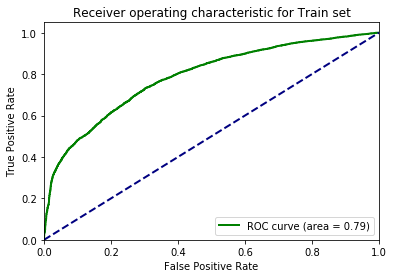

In [29]:

from sklearn.metrics import roc_curve, auc

X = XN_tr.copy()
X = add_1_col(X)

print('Train set')
pred_y = predict(X, log_theta)
#print(pred_y)

# ROC Curve for train 
fpr, tpr, thresholds = roc_curve(yB, pred_y, pos_label=1)

roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='g',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for Train set')
plt.legend(loc="lower right")
plt.show()


Test Set


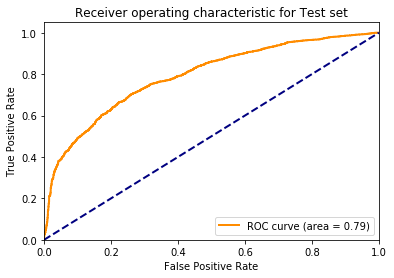

In [30]:

X_test = XN_ts.copy()
X_test = add_1_col(X_test)

print('Test Set')
pred_y_test = predict(X_test, log_theta)
#print(pred_y_test)
#print()


# ROC Curve for train 
fpr_test, tpr_test, thresholds_test = roc_curve(y_testB, pred_y_test, pos_label=1)

roc_auc_test = auc(fpr_test, tpr_test)


plt.figure()
lw = 2
plt.plot(fpr_test, tpr_test, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc_test)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for Test set')
plt.legend(loc="lower right")
plt.show()


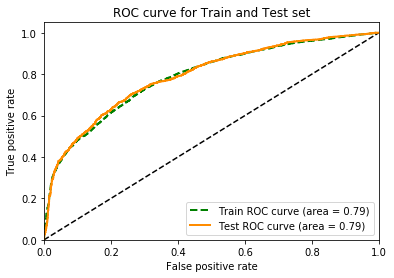

In [31]:
# Plot together 

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, color='g', ls='--',
         lw=lw, label='Train ROC curve (area = %0.2f)' % roc_auc)
plt.plot(fpr_test, tpr_test, color='darkorange',
         lw=lw, label='Test ROC curve (area = %0.2f)' % roc_auc_test)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve for Train and Test set')
plt.legend(loc='lower right')
plt.show()

## Experimentation 1. on Logistic Regression

(13814, 1)
Cost with theta 0: 0.6931471805599453
(22, 1)
Converged!
Final_Cost: 0.53395142026246 
Final_iters: 3208

Cost for test set with beta21: 0.5339404789029161

(13814, 1)
Cost with theta 0: 0.6931471805599453
(22, 1)
Converged!
Final_Cost: 0.5339722720667518 
Final_iters: 11844

Cost for test set with beta22: 0.5339072361312494

(13814, 1)
Cost with theta 0: 0.6931471805599453
(22, 1)
Converged!
Final_Cost: 0.5341862173583496 
Final_iters: 61921

Cost for test set with beta23: 0.5339485525714681

(13814, 1)
Cost with theta 0: 0.6931471805599453
(22, 1)
Max_iters reached.
Final_Cost: 0.5405812659005617 
Final_iters: 100000

Cost for test set with beta24: 0.540368116420695



"\n#--- Just to see: Using learning rate(alpha): 1\nbeta25, cost_train25, iters_train25, cost_lst_train25 = log_fit(X, yB, theta, alpha=al, max_iters=100000, threshold=0.1**8)\nplot_errors_on_iters(iters_train25, cost_lst_train25, alpha=al, threshold=th2, color = 'c')\ncost_test25 = calculate_logit_cost(X2, y2, beta25)\nprint('\nCost for test set with beta25:', cost_test25)\nprint()\n"

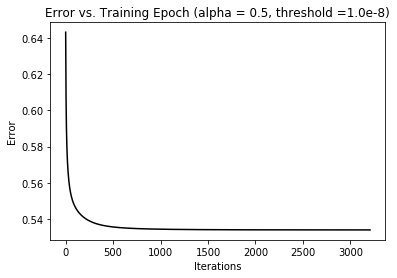

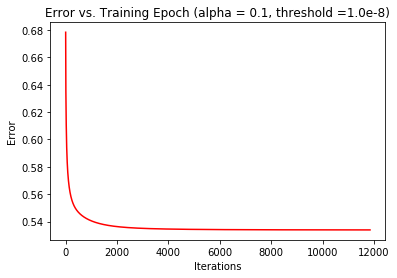

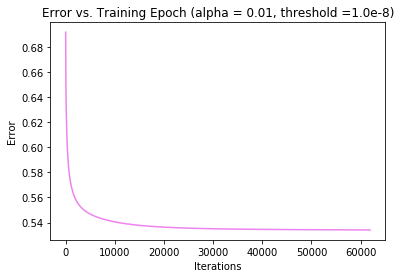

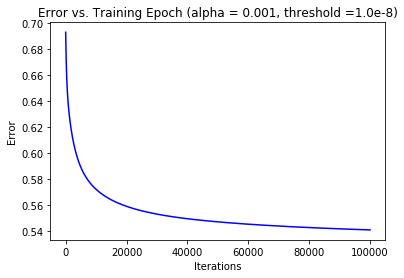

In [32]:
#--- Experimentation 1 on Logistic Regression
#--- Plot error results for train and test sets as a function of threshold

#--- Threshold is set to be 0.1**8 for various learning rates (alphas).
#--- Alpha varies from 0.1**3 to 0.5
#--- Max iteration number default: 100,000
#--- Threshold and Max iteration number can change it by inserting your own values.

X = XN_tr.copy()
X = add_1_col(X)
y = yB
X_test = XN_ts.copy()
X2 = add_1_col(X_test)
#X2 = add_1_col(X2)
y2 = y_testB
theta = np.zeros((X.shape[1], 1))
th = 0.1**8
th2 = '1.0e-8'

#--- Using learning rate(alpha): 0.5
al = 0.5
beta21, cost_train21, iters_train21, cost_lst_train21 = log_fit(X, yB, theta, lr=al, max_iters=100000, threshold=th)
plot_errors_on_iters(iters_train21, cost_lst_train21, alpha=al, threshold=th2, color = '#000000')
cost_test21 = calculate_logit_cost(X2, y2, beta21)
print('\nCost for test set with beta21:', cost_test21)
print()

#--- Using learning rate(alpha): 0.1
al = 0.1
beta22, cost_train22, iters_train22, cost_lst_train22 = log_fit(X, yB, theta, lr=al, max_iters=100000, threshold=0.1**8)
plot_errors_on_iters(iters_train22, cost_lst_train22, alpha=al, threshold=th2, color = 'r')
cost_test22 = calculate_logit_cost(X2, y2, beta22)
print('\nCost for test set with beta22:', cost_test22)
print()

#--- Using learning rate(alpha): 0.01
al = 0.01
beta23, cost_train23, iters_train23, cost_lst_train23 = log_fit(X, yB, theta, lr=al, max_iters=100000, threshold=0.1**8)
plot_errors_on_iters(iters_train23, cost_lst_train23, alpha=al, threshold=th2, color = '#EE82EE')
cost_test23 = calculate_logit_cost(X2, y2, beta23)
print('\nCost for test set with beta23:', cost_test23)
print()

#--- Using learning rate(alpha): 0.001
al = 0.001
beta24, cost_train24, iters_train24, cost_lst_train24 = log_fit(X, yB, theta, lr=al, max_iters=100000, threshold=0.1**8)
plot_errors_on_iters(iters_train24, cost_lst_train24, alpha=al, threshold=th2, color = 'b')
cost_test24 = calculate_logit_cost(X2, y2, beta24)
print('\nCost for test set with beta24:', cost_test24)
print()
'''
#--- Just to see: Using learning rate(alpha): 1
beta25, cost_train25, iters_train25, cost_lst_train25 = log_fit(X, yB, theta, alpha=al, max_iters=100000, threshold=0.1**8)
plot_errors_on_iters(iters_train25, cost_lst_train25, alpha=al, threshold=th2, color = 'c')
cost_test25 = calculate_logit_cost(X2, y2, beta25)
print('\nCost for test set with beta25:', cost_test25)
print()
'''

## Experimentation 2. on Logistic Regression (Not required for Assignment)

(13814, 1)
Cost with theta 0: 0.6931471805599453
(22, 1)
Converged!
Final_Cost: 0.5610655175591454 
Final_iters: 174

Cost for test set with beta27: 0.5599051634827718

(13814, 1)
Cost with theta 0: 0.6931471805599453
(22, 1)
Converged!
Final_Cost: 0.5353718081113472 
Final_iters: 2693

Cost for test set with beta27: 0.5349759613311379

(13814, 1)
Cost with theta 0: 0.6931471805599453
(22, 1)
Converged!
Final_Cost: 0.5339722720667518 
Final_iters: 11844

Cost for test set with beta22: 0.5339072361312494

(13814, 1)
Cost with theta 0: 0.6931471805599453
(22, 1)
Converged!
Final_Cost: 0.5339464342777714 
Final_iters: 23922

Cost for test set with beta28: 0.533970657549699



"\n#--- Using threshold: 0.00001\nbeta29, cost_train29, iters_train29, cost_lst_train29 = log_fit(X, yB, theta, lr=al, max_iters=15000, threshold=0.1**12)\nplot_errors_on_iters(iters_train29, cost_lst_train29, alpha=al, threshold='1.0e-12', color = 'c')\ncost_test29 = calculate_logit_cost(X2, y2, beta29)\nprint('\nCost for test set with beta29:', cost_test29)\nprint()\n"

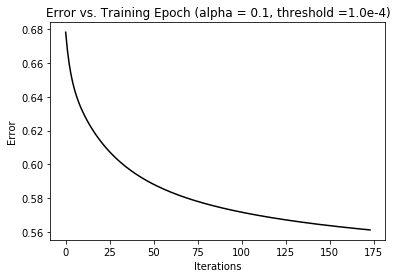

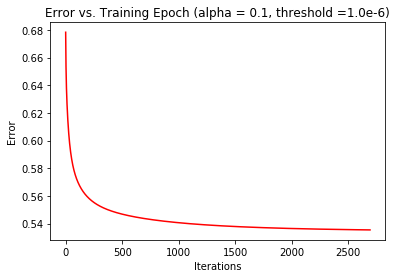

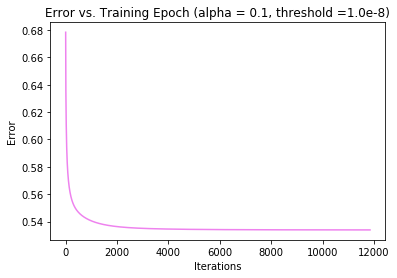

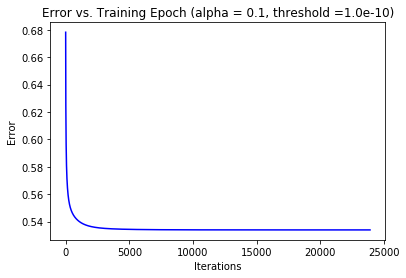

In [33]:
#--- Experimentation 2_Logistic Regression
#--- Plot error results for train and test sets as a function of threshold

#--- Alpha/Learning rate is set to be 0.1 for various Thresholds
#--- Threshold varies from 0.1**10 to 0.1**4
#--- Max iteration number: 100,000
#--- Threshold and Max iteration number can change it by inserting your own values.
X = XN_tr.copy()
X = add_1_col(X)
y = yB
X_test = XN_ts.copy()
X2 = add_1_col(X_test)
#X2 = add_1_col(X2)
y2 = y_testB
theta = np.zeros((X.shape[1], 1))
al = 0.1

#--- Using threshold: 0.1**4
th = 0.1**4
beta26, cost_train26, iters_train26, cost_lst_train26 = log_fit(X, yB, theta, lr=al, max_iters=100000, threshold=th)
plot_errors_on_iters(iters_train26, cost_lst_train26, alpha=al, threshold='1.0e-4', color = '#000000')
cost_test26 = calculate_logit_cost(X2, y2, beta26)
print('\nCost for test set with beta27:', cost_test26)
print()

#--- Using threshold: 0.1**6
th = 0.1**6
beta27, cost_train27, iters_train27, cost_lst_train27 = log_fit(X, yB, theta, lr=al, max_iters=100000, threshold=th)
plot_errors_on_iters(iters_train27, cost_lst_train27, alpha=al, threshold='1.0e-6', color = 'r')
cost_test27 = calculate_logit_cost(X2, y2, beta27)
print('\nCost for test set with beta27:', cost_test27)
print()

#--- Using threshold: 0.1**8
th = 0.1**8
beta22, cost_train22, iters_train22, cost_lst_train22 = log_fit(X, yB, theta, lr=al, max_iters=100000, threshold=th)
plot_errors_on_iters(iters_train22, cost_lst_train22, alpha=al, threshold='1.0e-8', color = '#EE82EE')
cost_test22 = calculate_logit_cost(X2, y2, beta22)
print('\nCost for test set with beta22:', cost_test22)
print()

#--- Using threshold: 0.1**10
th = 0.1**10
beta28, cost_train28, iters_train28, cost_lst_train28 = log_fit(X, yB, theta, lr=al, max_iters=100000, threshold=th)
plot_errors_on_iters(iters_train28, cost_lst_train28, alpha=al, threshold='1.0e-10', color = 'b')
cost_test28 = calculate_logit_cost(X2, y2, beta28)
print('\nCost for test set with beta28:', cost_test28)
print()
'''
#--- Using threshold: 0.00001
beta29, cost_train29, iters_train29, cost_lst_train29 = log_fit(X, yB, theta, lr=al, max_iters=15000, threshold=0.1**12)
plot_errors_on_iters(iters_train29, cost_lst_train29, alpha=al, threshold='1.0e-12', color = 'c')
cost_test29 = calculate_logit_cost(X2, y2, beta29)
print('\nCost for test set with beta29:', cost_test29)
print()
'''

## Experimentation 3.
### Pick ten features randomly and retrain your models only on these ten features. Compare train and test error results for the case of using your original set of features (greater than 15) and ten random features. Report the ten randomly selected features.


 ['RH_9', 'T7', 'RH_2', 'Press_mm_hg', 'RH_out', 'T9', 'T_out', 'T3', 'T2', 'T4']
           RH_9        T7      RH_2  Press_mm_hg    RH_out        T9  \
2153   1.594304 -1.173526  1.051539     0.688060 -0.209299 -1.090356   
14205 -0.549846 -0.034820  0.586143     1.257950  0.922007  0.352712   
8031  -1.063482 -1.345198 -0.097497    -0.924750  0.555996 -0.986217   
17122 -0.070384  1.839397 -1.506308    -0.370628 -2.128082  2.038771   
3283   1.114270 -0.690271  0.536061     0.606969 -0.874773 -0.440727   

          T_out        T3        T2        T4  
2153   0.516902 -0.880251 -0.484568 -0.911359  
14205 -0.141526 -0.190714 -0.641294  0.311566  
8031  -0.881088 -0.533002 -0.875248 -1.384224  
17122  2.835444  1.991992  2.952812  2.072580  
3283  -0.269468 -0.240321  0.579960  0.698011  
           RH_9        T7      RH_2  Press_mm_hg    RH_out        T9  \
9258  -0.738524  0.213971  1.491020     1.219266  0.753604  0.060167   
10439  0.060621  0.118505  0.379152     0.104502  0.

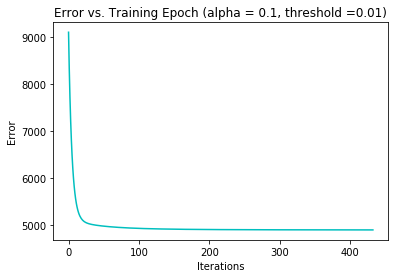

In [34]:
#--- Random 10 features with Linear Regression

X = XN_tr.copy()
y = y_tr.copy()
X_test = XN_ts.copy()
y_test = y_ts.copy()

X_tr_random = XN_tr.copy().sample(10, random_state=1,  axis=1)
col_names_random = list(X_tr_random.columns.values.tolist()) 
print('\n', col_names_random)

X_ts_random = XN_ts.copy().sample(10, random_state=1, axis=1)
print(X_tr_random.head())
print(X_ts_random.head())
'''
print('* Y Trainset for linear regression')
print(y.head())
print('* Y Testset for linear regression')
print(y_test.head())
print('* Y Trainset for logistic regression')
print(yB)
print('* Y Testset for logistic regression')
print(y_testB.head())
'''

seed(123)
X_tr_random = add_1_col(X_tr_random)
y = y_tr.copy()
beta = np.zeros((1, X_tr_random.shape[1]))
X_ts_random = add_1_col(X_ts_random)

beta_r, cost_train_r, iters_train_r, cost_lst_train_r = lin_Reg(X_tr_random, y, beta, alpha=0.1, threshold=0.01)
print('\nCost for train set with beta_r', cost_train_r)
plot_errors_on_iters(iters_train_r, cost_lst_train_r, alpha=0.1, threshold=0.01, color ='c')
cost_test_r = cal_cost(X_ts_random, y_test, beta_r)
print('\nCost for test set with beta_r:', cost_test_r)
print()
print('\nCoefficients:', beta_r)

           RH_9        T7      RH_2  Press_mm_hg    RH_out        T9  \
2153   1.594304 -1.173526  1.051539     0.688060 -0.209299 -1.090356   
14205 -0.549846 -0.034820  0.586143     1.257950  0.922007  0.352712   
8031  -1.063482 -1.345198 -0.097497    -0.924750  0.555996 -0.986217   
17122 -0.070384  1.839397 -1.506308    -0.370628 -2.128082  2.038771   
3283   1.114270 -0.690271  0.536061     0.606969 -0.874773 -0.440727   

          T_out        T3        T2        T4  
2153   0.516902 -0.880251 -0.484568 -0.911359  
14205 -0.141526 -0.190714 -0.641294  0.311566  
8031  -0.881088 -0.533002 -0.875248 -1.384224  
17122  2.835444  1.991992  2.952812  2.072580  
3283  -0.269468 -0.240321  0.579960  0.698011  
           RH_9        T7      RH_2  Press_mm_hg    RH_out        T9  \
9258  -0.738524  0.213971  1.491020     1.219266  0.753604  0.060167   
10439  0.060621  0.118505  0.379152     0.104502  0.776432  0.060167   
16471 -0.716662  0.960655 -1.015872     1.108915 -0.524787  0.5

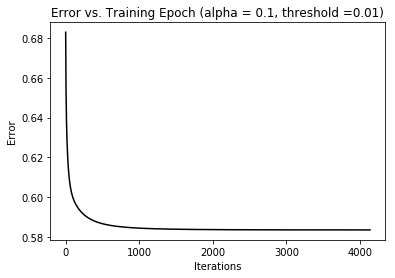

In [38]:
#--- Random 10 features with Logistic Regression

X = XN_tr.copy()
y = y_tr.copy()
X_test = XN_ts.copy()
y_test = y_ts.copy()

X_tr_random = XN_tr.copy().sample(10, random_state=1,  axis=1)

X_ts_random = XN_ts.copy().sample(10, random_state=1, axis=1)
print(X_tr_random.head())
print(X_ts_random.head())
'''
print('* Y Trainset for linear regression')
print(y.head())
print('* Y Testset for linear regression')
print(y_test.head())
print('* Y Trainset for logistic regression')
print(yB)
print('* Y Testset for logistic regression')
print(y_testB.head())
'''

seed(123)
X_tr_random = add_1_col(X_tr_random)
y = y_tr.copy()
theta = np.zeros((X_tr_random.shape[1],1))
X_ts_random = add_1_col(X_ts_random)

theta_r, cost_train_r, iters_train_r, cost_lst_train_r = log_fit(X_tr_random, yB, theta, lr=0.1, threshold=0.1**8)
print('\nCost for train set with beta_r', cost_train_r)
plot_errors_on_iters(iters_train_r, cost_lst_train_r, alpha=0.1, threshold=0.01, color ='#000000')
cost_test_r = calculate_logit_cost(X_ts_random, y_testB, theta_r)
print('\nCost for test set with beta_r:', cost_test_r)
print()



In [39]:
#--- Check Accuracy with Train Set with Randomly selected features

print('Train set')
pred_y_random = predict(X_tr_random, theta_r)
#print(pred_y)
#print()
pred_y_random = classify(pred_y_random)
#print(classify(pred_y))

accuracy(pred_y_random, yB)
sensitivity(pred_y_random, yB)
specificity(pred_y_random, yB)

# Check
(7100+2407)/(9885+3929)

Train set
Accuracy: 0.6882

Total number of predictied y as Positive: 9885
Total number of true Positive predicted as Positive: 7100
    Sensitivity: 0.7183

Total number of predictied y as Negative: 3929
Total number of true Negative predicted as Negative: 2407
    Specificity: 0.6126



0.6882148544954394

In [40]:
#--- Check Accuracy with Test Set with Randomly selected features

X_test = XN_ts.copy()
X_test = add_1_col(X_test)

print('Test Set')
pred_y_test_rd = predict(X_ts_random, theta_r)
#print(pred_y_test)
#print()
pred_y_test_rd = classify(pred_y_test_rd)
#print(classify(pred_y_test))

accuracy(pred_y_test_rd, y_testB)
sensitivity(pred_y_test_rd, y_testB)
specificity(pred_y_test_rd, y_testB)

# Check 
(3000+1054)/(4216+1705)

Test Set
Accuracy: 0.6847

Total number of predictied y as Positive: 4216
Total number of true Positive predicted as Positive: 3000
    Sensitivity: 0.7116

Total number of predictied y as Negative: 1705
Total number of true Negative predicted as Negative: 1054
    Specificity: 0.6182



0.6846816416145921

## Experimentation 4.
### Now pick ten features that you think are best suited to predict the output, and retrain your models using these ten features. Compare to the case of using your original set of features and to the random features case. Did your choice of features provide better results than picking random features? Why? Did your choice of features provide better results than using all features? Why?

In [41]:
### According to EDA and previous Experiment, reasonable guess, and background information
# Ten features: ['T1', 'RH_1', 'T2', 'RH_2', 'T3', 'T7', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'Windspeed']
'''Best so far
X_tr2 = XN_tr[['T1', 'RH_1', 'T2', 'RH_2', 'T3', 'T7', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'Windspeed']].copy()
y = y_tr.copy()
X_test2 = XN_ts[['T1', 'RH_1', 'T2', 'RH_2', 'T3', 'T7', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'Windspeed']].copy()
y_test2 = y_ts.copy()
'''

'''
X_tr2 = XN_tr[['T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T_out', 'Press_mm_hg', 'Windspeed']].copy()
y = y_tr.copy() # 4753.33
X_test2 = XN_ts[['T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3','T_out', 'Press_mm_hg', 'Windspeed']].copy()
y_test2 = y_ts.copy() # 4725.64

X_tr2 = XN_tr[['T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T9', 'T_out', 'Press_mm_hg', 'Windspeed']].copy()
y = y_tr.copy() # 4753.33
X_test2 = XN_ts[['T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T9', 'T_out', 'Press_mm_hg', 'Windspeed']].copy()
y_test2 = y_ts.copy() # 4725.64

X_tr2 = XN_tr[['T1', 'RH_1', 'T2', 'RH_2', 'T3', 'T7', 'T9', 'T_out', 'Press_mm_hg', 'Windspeed']].copy()
y = y_tr.copy() # 4763.71
X_test2 = XN_ts[['T1', 'RH_1', 'T2', 'RH_2', 'T3', 'T7', 'T9', 'T_out', 'Press_mm_hg', 'Windspeed']].copy()
y_test2 = y_ts.copy() # 4743.45

X_tr2 = XN_tr[['T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T7', 'T_out', 'Press_mm_hg', 'Windspeed']].copy()
y = y_tr.copy() # 4789.89
X_test2 = XN_ts[['T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T7', 'T_out', 'Press_mm_hg', 'Windspeed']].copy()
y_test2 = y_ts.copy() # 4756.63

X_tr2 = XN_tr[['T1', 'RH_1', 'T2', 'T3', 'T7', 'T8', 'T9', 'T_out', 'Press_mm_hg', 'Windspeed']].copy()
y = y_tr.copy() # 4917.77
X_test2 = XN_ts[['T1', 'RH_1', 'T2', 'T3', 'T7', 'T8',  'T9', 'T_out', 'Press_mm_hg', 'Windspeed']].copy()
y_test2 = y_ts.copy() # 4897.62

# Worst
X_tr2 = XN_tr[['T1', 'T2',  'T3', 'T4', 'T5', 'T7', 'T9', 'T_out', 'Press_mm_hg', 'Windspeed']].copy()
y = y_tr.copy() # 4969.60
X_test2 = XN_ts[['T1', 'T2', 'T3', 'T4', 'T5', 'T7', 'T9', 'T_out', 'Press_mm_hg', 'Windspeed']].copy()
y_test2 = y_ts.copy() #4956.51

X_tr2 = XN_tr[['T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T9', 'RH_9', 'Press_mm_hg', 'Windspeed']].copy()
y = y_tr.copy() # 4680.82
X_test2 = XN_ts[['T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3','T9',  'RH_9','Press_mm_hg', 'Windspeed']].copy()
y_test2 = y_ts.copy() # 4642.32
'''
X_tr2 = XN_tr[['T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T8', 'RH_8', 'Press_mm_hg', 'Windspeed']].copy()
y = y_tr.copy() # 4641.68
X_test2 = XN_ts[['T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T8', 'RH_8','Press_mm_hg', 'Windspeed']].copy()
y_test2 = y_ts.copy() # 4596.69

X_best = X_tr2.copy()
X_test_best = X_test2.copy()

print(X_best.describe())
print(X_test_best.describe())

                 T1          RH_1            T2          RH_2            T3  \
count  1.381400e+04  1.381400e+04  1.381400e+04  1.381400e+04  1.381400e+04   
mean  -1.446422e-12 -4.872760e-13 -1.074291e-12 -4.892008e-13 -9.815758e-13   
std    1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
min   -3.046884e+00 -3.265314e+00 -1.933718e+00 -4.869538e+00 -2.517280e+00   
25%   -5.807876e-01 -7.430572e-01 -6.965646e-01 -6.194896e-01 -7.363904e-01   
50%   -5.899402e-02 -1.570108e-01 -1.620293e-01  1.732546e-02 -8.653945e-02   
75%    5.828949e-01  7.116086e-01  5.345322e-01  7.070727e-01  5.203188e-01   
max    2.835718e+00  5.795415e+00  4.315650e+00  3.818672e+00  3.435554e+00   

               RH_3            T8          RH_8   Press_mm_hg     Windspeed  
count  1.381400e+04  1.381400e+04  1.381400e+04  1.381400e+04  1.381400e+04  
mean  -7.835187e-13 -9.220949e-13 -3.569932e-13 -1.818164e-13 -1.035652e-15  
std    1.000000e+00  1.000000e+00  1.000000e+00  1.000

In [42]:
#--- Linear Regression on Best-feature-selected Set

X_best = X_tr2.copy()
X_test_best = X_test2.copy()

X = add_1_col(X_best)
y = y_tr.copy()
beta = np.zeros((1, X.shape[1]))

beta_fit, cost_train, iters_train, cost_lst_train = lin_Reg(X, y, beta)
print('\nBetas(=Coefficients):\n', beta_fit)


#---Testing our model in the test data set
#beta = np.zeros((1, X.shape[1]))

X_test = add_1_col(X_test_best)
y_test = y_ts.copy()
beta = np.zeros((1, X_test.shape[1]))

#--- Use betas first by run the model on train set
#--- Calculate the cost/error for test set

cost_test = cal_cost(X_test, y_test, beta_fit)
#print('\nCost for test set:',  cost_test)
print('\nCost for test set: {:.4f}'.format(cost_test))
#print('\nCoefficients:\n',beta_fit)

Converged!
Final_Cost: 4641.680346014199 
Final_iters: 2720

Betas(=Coefficients):
 [[ 98.01288548   3.7722343   73.03064215 -48.43955613 -70.20554335
   30.65742864  22.93414407   4.56675973 -33.33952265   0.32024564
    6.66436314]]

Cost for test set: 4596.6503


In [43]:
#--- Logistic Regression on Best-feature-selected Set

X_best = X_tr2.copy()
X_test_best = X_test2.copy()

theta = np.zeros((X.shape[1],1))

X = add_1_col(X_best)

log_theta, log_cost, log_iters, log_cost_lst = log_fit(X, yB, theta, lr=0.1, threshold = 0.1**8, max_iters = 150000)
print('\nCoefficients:\n {} \nCost:\n {:.4f} \nNumber of iteration:\n {}'.format(log_theta.T, log_cost, log_iters))


#---Testing our model in the test data set

X_test = add_1_col(X_test_best)
print('\nCost for Test set:\n {:.4f}'.format(calculate_logit_cost(X_test, y_testB, log_theta)))

(13814, 1)
Cost with theta 0: 0.6931471805599453
(11, 1)
Converged!
Final_Cost: 0.5624329584624047 
Final_iters: 11521

Coefficients:
 [[ 0.66243651  0.51627849  1.90932516 -0.58654119 -1.20231479 -0.23074461
  -0.06823868  0.57020823 -0.89131256 -0.09131384  0.19826558]] 
Cost:
 0.5624 
Number of iteration:
 11521

Cost for Test set:
 0.5621


In [46]:
#--- Check Accuracy with Train Set with Best selected features


X_best = X_tr2.copy()
theta = np.zeros((X.shape[1],1))
X = add_1_col(X_best)

print('Train set')
pred_y_best = predict(X, log_theta)
#print(pred_y)
#print()
pred_y_best = classify(pred_y_best)
#print(classify(pred_y))

accuracy(pred_y_best, yB)
sensitivity(pred_y_best, yB)
specificity(pred_y_best, yB)

# Check
(7100+2407)/(9885+3929)

Train set
Accuracy: 0.7067

Total number of predictied y as Positive: 9428
Total number of true Positive predicted as Positive: 6999
    Sensitivity: 0.7424

Total number of predictied y as Negative: 4386
Total number of true Negative predicted as Negative: 2763
    Specificity: 0.6300



0.6882148544954394

In [47]:
#--- Check Accuracy with Test Set with Best selected features

X_test_best = X_test2.copy()
X_test = add_1_col(X_test_best)
theta = np.zeros((X.shape[1],1))


print('Test Set')
pred_y_test_best = predict(X_test, log_theta)
#print(pred_y_test)
#print()
pred_y_test_best = classify(pred_y_test_best)
#print(classify(pred_y_test))

accuracy(pred_y_test_best, y_testB)
sensitivity(pred_y_test_best, y_testB)
specificity(pred_y_test_best, y_testB)

# Check 
(3000+1054)/(4216+1705)

Test Set
Accuracy: 0.7139

Total number of predictied y as Positive: 3979
Total number of true Positive predicted as Positive: 2968
    Sensitivity: 0.7459

Total number of predictied y as Negative: 1942
Total number of true Negative predicted as Negative: 1259
    Specificity: 0.6483



0.6846816416145921